In [5]:
#importing required libraries
import numpy as np
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
%matplotlib inline

In [ ]:
coviddata=pd.read_excel("corona_recovered_ver_00163.xlsx")

In [ ]:
coviddata.head()

Read the file into pandas dataframe

In [6]:
coviddata_tested=pd.read_excel("corona_tested_individuals_subset_ver_00132.xlsx")

Dropping NAN values and preporcessing the dataset

In [7]:
coviddata_tested = coviddata_tested.dropna(axis=0)

In [8]:
coviddata_tested['age_60_and_above']=coviddata_tested['age_60_and_above'].map(dict(Yes=1, No=0))

In [9]:
coviddata_tested.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-09-02,0,0,0,0,0,Positive,0,Female,Other
1,2021-09-02,0,0,0,0,0,Positive,0,Female,Other
2,2021-09-02,0,0,0,0,0,Negative,0,Female,Other
3,2021-09-02,0,0,0,0,0,Negative,0,Male,Other
4,2021-09-02,0,0,0,0,0,Positive,0,Male,Other


In [10]:
coviddata_tested['gender']=coviddata_tested['gender'].map(dict(Female=1, Male=0))

In [11]:
coviddata_tested.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-09-02,0,0,0,0,0,Positive,0,1,Other
1,2021-09-02,0,0,0,0,0,Positive,0,1,Other
2,2021-09-02,0,0,0,0,0,Negative,0,1,Other
3,2021-09-02,0,0,0,0,0,Negative,0,0,Other
4,2021-09-02,0,0,0,0,0,Positive,0,0,Other


In [12]:
coviddata_tested['corona_result']=coviddata_tested['corona_result'].map(dict(Positive=1, Negative=0))

Creating correlation chart to check correlation among different features

In [10]:
corr=coviddata_tested.corr()

<AxesSubplot:>

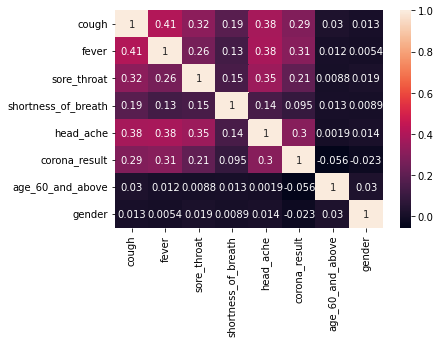

In [11]:
sns.heatmap(corr,annot=True)

In [12]:
coviddata_tested.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
count,192452.000000,192452.000000,192452.000000,192452.000000,192452.000000,186082.000000,192452.000000,192452.000000
mean,0.018950,0.019865,0.008501,0.001647,0.017604,0.129104,0.138887,0.537630
std,0.136349,0.139536,0.091807,0.040552,0.131509,0.335316,0.345829,0.498583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
coviddata_tested.isnull().values.any()

True

In [14]:
coviddata_tested.dropna(axis=0, inplace = True)

K Means custering is applied on the dataset without labels.

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [16]:
kmeans.fit(coviddata_tested.drop(['test_date','test_indication','corona_result'],axis=1))
kmeans.cluster_centers_

array([[ 2.08243688e-02,  2.09544586e-02,  1.02670843e-02,
         2.02139476e-03,  1.96435541e-02,  1.48582522e-01,
         1.00000000e+00],
       [ 1.73184293e-02,  1.92568862e-02,  6.68593516e-03,
         1.28843542e-03,  1.57862358e-02,  1.28089053e-01,
        -1.33781874e-13]])

In [17]:
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

In [20]:
from sklearn.metrics import silhouette_samples,silhouette_score

silhouette_samples(coviddata_tested.drop(['test_date','test_indication','corona_result'],axis=1),kmeans.labels_)

array([0.8162953 , 0.8162953 , 0.8162953 , ..., 0.8162953 , 0.84327714,
       0.84327714])

In [21]:
silhouette_score_1=silhouette_score(coviddata_tested.drop(['test_date','test_indication'],axis=1),kmeans.labels_)

In [22]:
silhouette_score_1

0.627428801247848

In [18]:
#adding kmeans.labels_ to existing Dataframe
labels=kmeans.labels_
coviddata_tested['long_short_covid']=labels

In [19]:
coviddata_tested.head()


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,long_short_covid
0,2021-09-02,0,0,0,0,0,1.0,0,1,Other,0
1,2021-09-02,0,0,0,0,0,1.0,0,1,Other,0
2,2021-09-02,0,0,0,0,0,0.0,0,1,Other,0
3,2021-09-02,0,0,0,0,0,0.0,0,0,Other,1
4,2021-09-02,0,0,0,0,0,1.0,0,0,Other,1


Applying  SVM on the current dataset with lables formed from clustering

In [20]:
X = coviddata_tested.drop(['test_date','test_indication','corona_result','long_short_covid'], axis=1)
y = coviddata_tested['long_short_covid']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)



In [27]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

[[20089     0]
 [    0 17128]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20089
           1       1.00      1.00      1.00     17128

    accuracy                           1.00     37217
   macro avg       1.00      1.00      1.00     37217
weighted avg       1.00      1.00      1.00     37217



<AxesSubplot:>

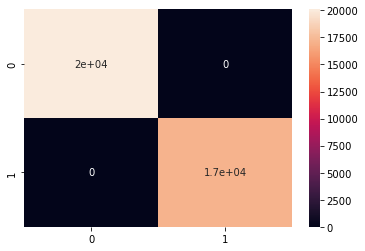

In [28]:
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

matrix=confusion_matrix(y_test,y_pred)


import seaborn as sns
sns.heatmap(matrix, annot=True)

Applying perceptron on the same dataset

In [22]:

from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)

clf.score(X, y)

1.0

In [23]:
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[19760     0]
 [    0 17457]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19760
           1       1.00      1.00      1.00     17457

    accuracy                           1.00     37217
   macro avg       1.00      1.00      1.00     37217
weighted avg       1.00      1.00      1.00     37217

